In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns



def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


def load_dataset(prefix=''):
    base_path = '/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset'

    # train 데이터
    X_train, y_train = load_dataset_group('train', base_path + '/')

    # test 데이터
    X_test, y_test = load_dataset_group('test', base_path + '/')

    # zero-offset class values
    y_train = y_train - 1
    y_test = y_test - 1

    # one-hot encoding
    trainy_one_hot = to_categorical(y_train)
    testy_one_hot = to_categorical(y_test)

    print(X_train.shape, y_train.shape, trainy_one_hot.shape, X_test.shape, y_test.shape, testy_one_hot.shape)
    return X_train, y_train, trainy_one_hot, X_test, y_test, testy_one_hot



X_train, y_train, trainy_one_hot, X_test, y_test, testy_one_hot = load_dataset()

from sklearn.model_selection import train_test_split

X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(X_train, trainy_one_hot, y_train,test_size=0.2,random_state=100)

X_train.shape,X_val.shape,y_train_one_hot.shape,y_val_one_hot.shape,y_train.shape,y_val.shape

/tmp/ipython-input-2916769849.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-2916769849.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-2916769849.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-2916769849.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=Tr

(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


((5881, 128, 9), (1471, 128, 9), (5881, 6), (1471, 6), (5881, 1), (1471, 1))

In [ ]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_one_hot.shape[1]

In [ ]:
from tensorflow.keras.layers import LSTM, concatenate, Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model

inputs1_1 = Input(shape=(n_timesteps, n_features))
lstm1_1 = LSTM(64)(inputs1_1)

inputs1_2 = Input(shape=(n_timesteps, n_features))
lstm1_2 = LSTM(64)(inputs1_2)

inputs1_3 = Input(shape=(n_timesteps, n_features))
lstm1_3 = LSTM(64)(inputs1_3)

inputs1_4 = Input(shape=(n_timesteps, n_features))
lstm1_4 = LSTM(64)(inputs1_4)

merged = concatenate([lstm1_1, lstm1_2, lstm1_3, lstm1_4])
dense = Dense(128, activation='relu')(merged)
drop = Dropout(0.5)(dense)
outputs = Dense(n_outputs, activation='softmax')(drop)

lstm_model = Model([inputs1_1, inputs1_2, inputs1_3, inputs1_4], outputs)
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()

history = lstm_model.fit([X_train, X_train, X_train, X_train], y_train_one_hot, epochs=30, batch_size=32, validation_split=0.1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │     18,944 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     18,944 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 64)        │     18,944 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 64)        │     18,944 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ lstm[0][0],       │
│ (Concatenate)       │                   │            │ lstm_1[0][0],     │
│                     │                   │            │ lstm_2[0][0],     │
│                     │                   │            │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     32,896 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 6)         │        774 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 109,446 (427.52 KB)

 Trainable params: 109,446 (427.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.4940 - loss: 1.2406 - val_accuracy: 0.7487 - val_loss: 0.6400
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7698 - loss: 0.6040 - val_accuracy: 0.9117 - val_loss: 0.2753
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8859 - loss: 0.3543 - val_accuracy: 0.9219 - val_loss: 0.2448
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8940 - loss: 0.3082 - val_accuracy: 0.9304 - val_loss: 0.2093
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9265 - loss: 0.2039 - val_accuracy: 0.9474 - val_loss: 0.1560
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9295 - loss: 0.1913 - val_accuracy: 0.9457 - val_loss: 0.1503
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9430 - loss: 0.1700 - val_accuracy: 0.9423 - val_loss: 0.1506
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9438 - loss: 0.1610 - val_acc

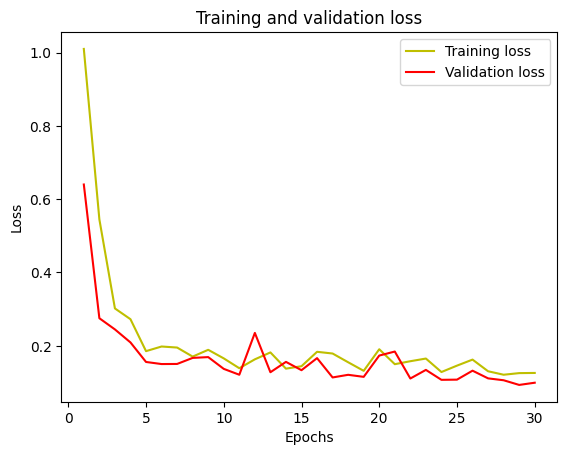

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

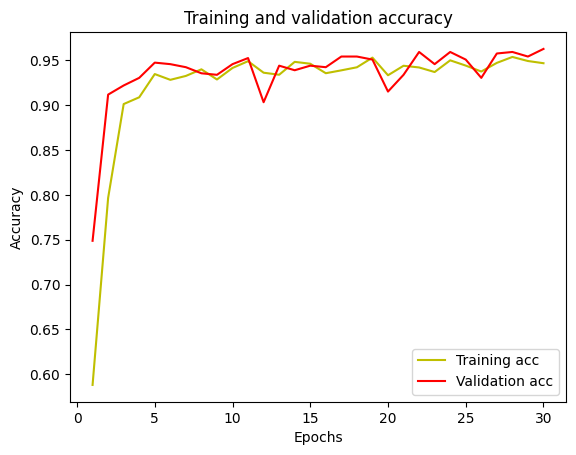

In [ ]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
[[454  10  32   0   0   0]
 [ 16 441  14   0   0   0]
 [ 10   3 407   0   0   0]
 [  2  25   0 377  87   0]
 [  6   0   0  83 443   0]
 [  0   0   0   0   0 537]]
0.9022734984730234
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       496
           1       0.92      0.94      0.93       471
           2       0.90      0.97      0.93       420
           3       0.82      0.77      0.79       491
           4       0.84      0.83      0.83       532
           5       1.00      1.00      1.00       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



<Axes: >

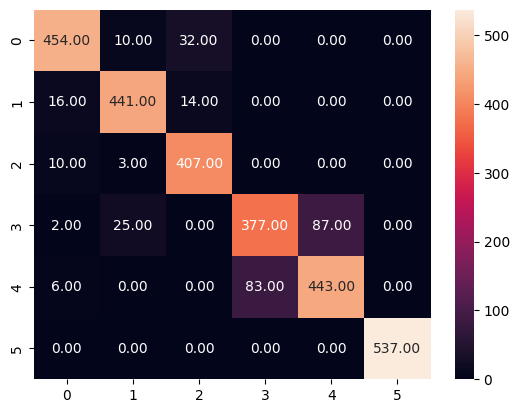

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred=lstm_model.predict([X_test,X_test,X_test,X_test])
pred=np.argmax(pred, axis=-1)
cm=confusion_matrix(y_test,pred)
print(cm)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')
